## Problem statement
**Time series analysis**

The analysis will help to understand the impact of various factors on the growth of a YouTube channel and provide insights for content creators and marketers to improve their strategies and increase their subscriber base.

- The number of subscribers on a YouTube channel can be used as an indicator of its popularity and success. A high number of subscribers typically means that the channel has a large and engaged audience. However, it's important to keep in mind that there are many factors that can contribute to a channel's success, such as the quality of the content, the frequency of uploads, and the level of engagement with the audience. Therefore, it's not always accurate to judge a channel's success solely based on its subscriber count.

In [1]:
# import libraries
import pandas as pd
from prophet import Prophet

In [2]:
data = pd.read_csv("/content/drive/MyDrive/CSV/Channel_analytics/Totals.csv")
data.sample(5)

,Date,Sub­scribers
68,2019-02-17,0
1374,2022-09-15,-3
72,2019-02-21,0
902,2021-05-31,55
56,2019-02-05,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1515 entries, 0 to 1514
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          1515 non-null   object
 1   Sub­scribers  1515 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 23.8+ KB


In [4]:
# oconverting the 'Date' to datetime type
data['Date'] = pd.to_datetime(data['Date'])

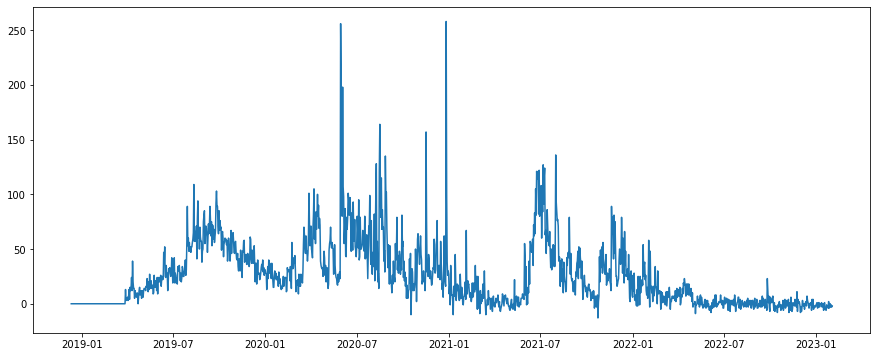

In [5]:
#plot subscriber count against the years
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.plot(data['Date'], data['Sub­scribers'])
plt.xticks(rotation = 0)
plt.show()


In [6]:
# creating object
m = Prophet()
data.columns = ['ds','y']

In [7]:
# fit model to dataset
model =m.fit(data)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp36av_b8f/f0mn5zz5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp36av_b8f/679vlt84.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=632', 'data', 'file=/tmp/tmp36av_b8f/f0mn5zz5.json', 'init=/tmp/tmp36av_b8f/679vlt84.json', 'output', 'file=/tmp/tmp36av_b8f/prophet_model2mum9evb/prophet_model-20230204182408.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:24:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:24:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [8]:
# creating 'forecast' future_dataframe, will check for next 365 days
future = m.make_future_dataframe(periods=365, freq='D')
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1875,2024-01-29,-40.601141,-80.834489,-24.507470,-52.347734,-28.826218,-10.018792,-10.018792,-10.018792,0.142043,0.142043,0.142043,-10.160835,-10.160835,-10.160835,0.0,0.0,0.0,-50.619933
1876,2024-01-30,-40.682431,-80.262940,-20.543220,-52.508831,-28.844866,-10.027660,-10.027660,-10.027660,0.387047,0.387047,0.387047,-10.414707,-10.414707,-10.414707,0.0,0.0,0.0,-50.710091
1877,2024-01-31,-40.763721,-80.034392,-20.954959,-52.674858,-28.863514,-11.270191,-11.270191,-11.270191,-0.601440,-0.601440,-0.601440,-10.668750,-10.668750,-10.668750,0.0,0.0,0.0,-52.033912
1878,2024-02-01,-40.845011,-81.639846,-22.620385,-52.803655,-28.892824,-11.388528,-11.388528,-11.388528,-0.469158,-0.469158,-0.469158,-10.919370,-10.919370,-10.919370,0.0,0.0,0.0,-52.233539
1879,2024-02-02,-40.926301,-84.563894,-24.791219,-52.931217,-28.925600,-12.958756,-12.958756,-12.958756,-1.795568,-1.795568,-1.795568,-11.163188,-11.163188,-11.163188,0.0,0.0,0.0,-53.885057


In [9]:
# checking the last few future_records
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1875,2024-01-29,-40.601141,-80.834489,-24.507470,-52.347734,-28.826218,-10.018792,-10.018792,-10.018792,0.142043,0.142043,0.142043,-10.160835,-10.160835,-10.160835,0.0,0.0,0.0,-50.619933
1876,2024-01-30,-40.682431,-80.262940,-20.543220,-52.508831,-28.844866,-10.027660,-10.027660,-10.027660,0.387047,0.387047,0.387047,-10.414707,-10.414707,-10.414707,0.0,0.0,0.0,-50.710091
1877,2024-01-31,-40.763721,-80.034392,-20.954959,-52.674858,-28.863514,-11.270191,-11.270191,-11.270191,-0.601440,-0.601440,-0.601440,-10.668750,-10.668750,-10.668750,0.0,0.0,0.0,-52.033912
1878,2024-02-01,-40.845011,-81.639846,-22.620385,-52.803655,-28.892824,-11.388528,-11.388528,-11.388528,-0.469158,-0.469158,-0.469158,-10.919370,-10.919370,-10.919370,0.0,0.0,0.0,-52.233539
1879,2024-02-02,-40.926301,-84.563894,-24.791219,-52.931217,-28.925600,-12.958756,-12.958756,-12.958756,-1.795568,-1.795568,-1.795568,-11.163188,-11.163188,-11.163188,0.0,0.0,0.0,-53.885057


In [15]:
# Approximate subscribers count after 365 days
print("At present, the channel has 38K subscribers, and after 365 days, it will have", round(forecast.yhat.sum()), "Subscribers.")

At present, the channel has 38K subscribers, and after 365 days, it will have 28747 Subscribers.


**During the next 365 days, the channel is expected to lose almost 10,000 subscribers.**

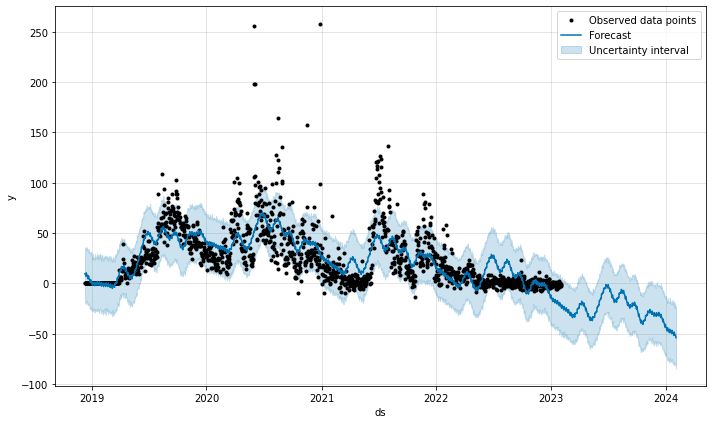

In [17]:
# Subscriber count - Year
from prophet.plot import plot_plotly, plot_components_plotly

fig1 = m.plot(forecast, include_legend =True)

In [24]:
#trend-yearly-weekly
plot_components_plotly(m, forecast)

## Observations

- Subscriptions to the channel reached the highest level in 2020 - 2021.And subscriptions reached highest during july- september on previous years.
- Currently, Saturday is the most popular day for subscribers to the channel.
- There has been a gradual decline in subscribers on this channel starting from August'22. This can be attributed to the fact that the number of contents on July'22 and the following months are very low.(Low frequency of contents)


Considering the channel has not been uploading content for the past 7-8 months regularly, this prediction is quite reasonable.

**Conclusion** 

Subscribers might lose interest if sYoutubers stop uploading content.


\\\\\\\\So keep working/uploading contents and keep gaining subscribers.////////

**Thank you!**